<a href="https://colab.research.google.com/github/danquio194/github-slideshow/blob/master/Segundo_Entregable_Daniel_Quinones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Second Problems' Set -  Machine Learning Introduction**

*by Daniel Felipe Quiñones Ordoñez*

In [2]:
#Libraries for this notebook

import matplotlib.pyplot as plt
import numpy as np
import math
import random 


**Exercise 1.12**
A friend comes to you with a learning problem. She says the target function $f$ is completly unknown, but she has $4000$ data points. She is willing to pay you to solve her problem and produce for her a $g$ which approximates $f$. What is the best that you can promise her among the following:



1.   After learning you will provide her with a $g$ that you will guarantee approximates $f$ well out of sample.
2.   After learning you will provide her with a $g$, and with high probability the $g$ which you produce will approximate $f$ well out of sample.
3.   One of two things will happen:

*   (i) You will produce a hypothesis $g$.
*   (ii) You will declare that you failed

If you do return a hypothesis $g$, then with high probability the g which you produce will approximate $f$ well out of sample.








**Solution:**

There is no guarantee that $g$ approximates $f$ well out of the sample. Even if we have a considerable huge amount of sample points. That could make us think in the (b) option, considering the probabilistic approach we accept for the feasability to learning out of the sample. However, still exists  the case that the learning not be succesful and the $E_{in}$ do not be close to zero neither close to $E_{out}$. Therefore the best answer we can give to our friend is the (c). Is more according to the reality: Though, as we seen in some of the exercises in this chapter, we always can give a $g$ hypothesis, there is no guarantee of succes in learning, and so we must have declare with shame our failed in the learning task. But, if we achieve in learn, with $4000$ sample points, and due to the Hoeffding inequality, the probability of $E_{in} \approx E_{out}$ is less than a small number, being caotious in keep the $M$ number of hipothesys small as well. 



**Problem 1.2**

Consider the perceptron in two dimensions: $h(x) = sign(w^{T} x)$ where $w = [w_{0}, w_{1}, w_{2}]^{T}$ and $x = [1, x_{1},x_{2}]^{T}$. Tecnically $x$ has three coordinates, but we call this perceptron two-dimensional because the first coordinate is fixed at $1$. $ \\ $

a). Show that the regions on the plane where $h(x) = +1$ and $h(x) = -1$ are separated by a line. If we express this line by the equation $x_{2} = ax_{1} + b$, what are the slope $a$ and the intercept $b$ in terms of $w_{0}, w_{1}, w_{2}$? $ \\ $

b). Draw a picture for the cases $w = [1, 2, 3]^{T}$ and $w = -[1, 2, 3]^{T}$ 

**Solution:**

a). An explicit formula for this perceptron is $w^{T}x = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} = w_{0} + w_{1}x_{1} + w_{2}x_{2}$

For the region where $h(x) = +1$ we have that $w_{0} + w_{1}x_{1} + w_{2}x_{2} > 0$, and in the other hand, where $h(x) = -1$, $w_{0} + w_{1}x_{1} + w_{2}x_{2} < 0$. In this way, the line between those regions is the line $w_{0} + w_{1}x_{1} + w_{2}x_{2} = 0$. Rewriting the last equation 

$
\begin{equation}
  x_{2} = \frac{-w_{1}}{w_{2}}x_{1} - \frac{w_{0}}{w_{2}}
\end{equation}
$

So, we can see that the scope $a = \frac{-w_{1}}{w_{2}}$ and the intercept $b =- \frac{w_{0}}{w_{2}}$

b). For this part we plot the pictures in the following code box. As they are equivalent, their plots are the same.

Text(0.5, 1.0, 'Line 2')

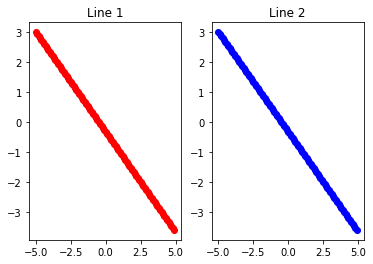

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
line1 = -(-2/-3)*x - 1/3
line2 = -(-2/-3)*x - (-1/-3)

plt.figure(1)
#plt.figure(1).suptitle('f(x)−cos(x), x_0 = 0.5')
plt.subplot(121)
plt.plot(x, line1, 'ro')
plt.title('Line 1') 

plt.subplot(122)
plt.plot(x, line1, 'bo')
plt.title('Line 2')



**Problem 1.4** In exercise 1.4, we use an artificial data set to study the perceptron learning algorithm. This problem leads you to explore the algorithm further with data sets od different sizes and dimensions:

(a). Generate a linearly separate data set of size 20 as indicated in Exercise 1.4. Plot the examples $\{ (x_{n}, y_{n}) \}$ as well as the target function $f$ on a plane. Be sure to mark the examples from different classes differently and add labels to the axes of the plot.

(b). Run the perceptron learning algorithm on the data set above. Report the number of updates that the algorithm takes before converging. Plot the examples $\{ (x_{n}, y_{n}) \}$, the target function $f$, and the final hypothesis $g$ in the same figure. Comment on whether $f$ is close to $g$.

(c). Repeat everything in (b) with another randomly generated data set of size 20. Compare your results with (b).

(d). Repeat everything in (b) with another randomly generated data set of size 100. Compare your results with (b).

(e). Repeat everything in (b) with another randomly generated data set of size 1000. Compare your results with (b).

(f). Modify the algorithm such that it takes $x_{n} \in \mathbb{R}^{10}$ instead of $\mathbb{R}^{2}$. Randmoly generate a linearly separable data set of size $1000$ with ${x_{n}}\in \mathbb{R}^{10}$ and feed the data set to the algorithm. How many updates does the algorithm take to converge?

(h). Summarize your conclusions with respect to accuracy andd running time as a function of $N$ and $d$.

**Solution:**

In [ ]:
#Picking a random target function f
x = np.arange(-5.0, 5.0, 0.1)
m = random.uniform(-10, 10)
b = random.uniform(-10, 10)

def random_f(x, b):
  return  m*x + b

target_f = random_f(x, b)
#Setting the random samples points

def randomSet(n, domain):
  x_n = []
  y_n_red = []
  y_n_green = []
  for i in range(n):
    point = random.uniform(-10, 10)
    x_n.append(point)
    if (point < b):
      y_n_red.append(random.uniform(-10, 10)*0.5 + 1)
    else:
      y_n_green.append(random.uniform(-10, 10)*(-0.5) - 1)
    i += 1
  return x_n, y_n_green, y_n_red

#samples = (x_n, random_f(m, x_n, b))
axes = randomSet(20, x)

#print(samples)
plt.subplot(131)
plt.plot(x, target_f, 'ko')

plt.subplot(132)
plt.plot(axes[0], axes[1], 'ro')

plt.subplot(133)
plt.plot(axes[0], axes[2], 'go' )
#, np.asarray(randomSet(20, x)[0]), np.asarray(randomSet(20, x)[1]), 'ro')

#, np.asarray(randomSet(20, x)[0]), np.asarray(randomSet(20, x)[2]), 'go' )

print(x_n)

**Problem 1.6** Consider a sample of 10 marbles drawn independtly from a bin that holds red and green marbles. The probability of a red marble is $\mu$. For $\mu = 0.05, \mu = 0.5,$ and $\mu = 0.8$, compute the probability of getting no red marbles ($\nu = 0$) in the following cases:

(a). We draw only one such a sample. Compute the probability that  $\nu = 0$.

(b). We draw $1000$ independent samples. Compute the probability that (at least) one of the samples has $\nu = 0$.

(c). Repeat (b) for $1000000$ independent samples.

**Solution:** Notice that $1 - \mu$ is the probability that the event "no red" occurs. For the independence of the drawing a bin, we get that $Pr(\nu = 0) = (1 - \mu)^{10}$ for each sample of 10 bins. 
Therefore we get as follows:

(a).

In [1]:
#Draw only one sample:

print("Probability of v=0 with mu = 0.05 =" , 0.95**10)
print("Probability of v=0 with mu = 0.5 =", 0.5**10)
print("Probability of v=0 with mu = 0.8 =", 0.2**10)

Probability of v=0 with mu = 0.05 = 0.5987369392383787
Probability of v=0 with mu = 0.5 = 0.0009765625
Probability of v=0 with mu = 0.8 = 1.0240000000000006e-07


(b). For this consider the event when none sample is $\nu = 0$. That is when $\nu > 0$ or, 

\begin{equation}
  Pr(\nu > 0) = 1 - Pr(\nu = 0) = 1 - (1 - \mu)^{10}
\end{equation}

As we have independence when we choose the marbles' samples, then for $1000$ drwas

\begin{align*}
  \prod_{i = 1}^{1000} Pr(\nu_{i} > 0) &= \prod_{i = 1}^{1000} 1 - Pr(\nu_{i} = 0) \\ 
                                  &=  \prod_{i = 1}^{1000} 1 - (1 - \mu)^{10} \\
                                  &= (1 - (1 - \mu)^{10})^{1000}
\end{align*}

Taking the complement of the last expression we get the desire probability. We show the compute when we make $1000$ draws samples.

In [3]:
#We define a function with the compute made before when we make 1000 draws
#to pick the samples' bins
def binExperiment(mu, n):
  return 1 - ((1 - (1-mu)**10)**n)

print("When mu = 0.05, the probability is ", binExperiment(0.05, 1000))
print("When mu = 0.5, the probability is ", binExperiment(0.5, 1000))
print("When mu = 0.8, the probability is ", binExperiment(0.8, 1000))


When mu = 0.05, the probability is  1.0
When mu = 0.5, the probability is  0.623576201943276
When mu = 0.8, the probability is  0.00010239476257623004


(c). We repeat the last case, but with $1000000$ independent samples.

In [4]:
#We define a function with the compute made before when we make 1000000 draws
#to pick the samples' bins
def binExperiment(mu, n):
  return 1 - ((1 - (1-mu)**10)**n)

print("When mu = 0.05, the probability is ", binExperiment(0.05, 10000000))
print("When mu = 0.5, the probability is ", binExperiment(0.5, 1000000))
print("When mu = 0.8, the probability is ", binExperiment(0.8, 1000000))


When mu = 0.05, the probability is  1.0
When mu = 0.5, the probability is  1.0
When mu = 0.8, the probability is  0.09733159268316072


**Problem 1.9** In this problem, we derive a form of the law of larger numbers that has an exponential bound, called the *Chernoff bound*. We focus on the simple case of flipping a fair coin, and use an approach similar to problem 1.8.

(a). Let $t$ be a finite random variable, $\alpha$ be a positive constant, and $s$ be a positive parameter. If $T(s) = \mathbb{E}_{t}(e^{st})$ prove that 

\begin{equation}
  P[t \geq \alpha] \leq e^{-s \alpha}T(s)
\end{equation}

(b). Let $u_{1}, u_{2}, ..., u_{N}$ be iid random variables, and let $u = \sum_{i=1}^{N} u_{n}$. If $U(s) = \mathbb{E}_{u_{n}} (e^{s u_{n}})$ for any n, prove that 

\begin{equation}
  P[u \geq \alpha] \leq (e^{-s \alpha}U(s))^{N}
\end{equation}

(c). Suppose $P[u_{n} = 0] = P[u_{n} = 1] = \frac{1}{2}$ (fair coin). Evaluate $U(s)$ as a function of $s$, and minimize $e^{-s \alpha} U(s)$ with respect to $s$ for fixed $\alpha$, $0 < \alpha < 1$.

(d) Conclude in (c) that, for $0 < \frac{\epsilon}{2} < 1$,

\begin{equation}
  P[u \geq \mathbb{E}(u) + \epsilon] \leq 2^{-\beta N}
\end{equation}

where $\beta = 1 + (\frac{1}{2} + \epsilon)log_{2}(\frac{1}{2} + \epsilon) + (\frac{1}{2} - \epsilon)log_{2}(\frac{1}{2} - \epsilon)$ and $\mathbb{E}(u) = \frac{1}{2}$. Show that $\beta > 0$, hence the bound is exponentially decreasing in $N$.

**Solution:**

(a). We get that for Markov's inequality $P[X \geq \alpha] \leq \frac{\mathbb{E}(X)}{a}$ with $a \in \mathbb{R}$. Thus we can apply this inequality to 

\begin{equation}
  P[t \geq \alpha] = P[e^{st} \geq e^{s \alpha}] \leq \frac{\mathbb{E}(e^{st})}{e^{s \alpha}}
\end{equation}

that is what we want to prove.

(b). Using the last assertion and applying it to $P[Nu \geq N \alpha]$, with an analogous argument we get that 

\begin{align*}
  P[Nu \geq N \alpha] &= P[e^{sNu} \geq e^{sN\alpha}] \\
  P[u \geq  \alpha]   & \leq e^{-sN\alpha} \mathbb{E}(e^{sNu}) \\
                      & \leq e^{-sN\alpha} \mathbb{E}(e^{s \sum_{n=1}^{N} u_{n}}) \\
                      & \leq e^{-sN\alpha} \mathbb{E}(\prod_{n=1}^{N} e^{s u_{n}}) \\
                      & \leq e^{-sN\alpha} \prod_{n=1}^{N} \mathbb{E} (e^{s u_{n}}) \\
\end{align*}

As for $n = 1, ..., N$, $u_{n}$ are iid, we get that 

\begin{align*}
  P[u \geq  \alpha] & \leq e^{-sN\alpha} [\mathbb{E} (e^{s u_{n}})]^{N} \\
                    & \leq [e^{-s\alpha} \mathbb{E} (e^{s u_{n}})] ^{N}
\end{align*}

finishing the prove.

(c). We get that for definition of the expectancie and its properties, 

$U(s) = \mathbb{E}_{u_{n}}(e^{su_{n}}) = P[u_{n} = 0]e^{0} + P[u_{n} = 1] = \frac{1}{2}(1 + e^{s})$.

To minimize the last expression with respect to s, lets derivate 

\begin{equation}
  G(s) = e^{-s \alpha} \frac{1}{2} (1 + e^{s}) = \frac{1}{2}(e^{-s \alpha} + e^{s(1 - \alpha)})
\end{equation}

with respect to s and find its minimum point.

\begin{equation}
  \frac{dG(s)}{ds} = \frac{-\alpha}{2} e^{-s \alpha} + \frac{1 -\alpha}{2} e^{s(1 - \alpha)} = 0
\end{equation}

Then,

\begin{align*}
  (1 - \alpha) e^{s(1 - \alpha)} &= \alpha e^{-s \alpha} \\
  e^{s(1 - \alpha)} e^{-s \alpha} &= \frac{\alpha}{1 - \alpha} \\
  e^{s} &= \frac{\alpha}{1 - \alpha} \\
  s &= ln(\frac{\alpha}{1 - \alpha}) > 0
\end{align*}

since $0 < \alpha < 1$. Therefore this value is a minimum for $G(s)$.
